In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import random

In [2]:
# Load dataset
data = pd.read_csv('https://github.com/Kamesh22/Butterfly-Optimization/blob/main/Test_data.csv?raw=true')


In [3]:
# Convert categorical features to numerical
data['protocol_type'] = pd.factorize(data['protocol_type'])[0]
data['service'] = pd.factorize(data['service'])[0]
data['flag'] = pd.factorize(data['flag'])[0]


In [4]:
# Split into features and target
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [5]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Define the fitness function
def fitness(params):
    global X_train, y_train
    
    # Use the input parameters to train the model
    n_estimators = int(round(params[0]))
    reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=params[1], min_samples_split=params[2], min_samples_leaf=params[3], random_state=42)
    reg.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    return r2


In [7]:
# Define the Butterfly Optimization algorithm
def butterfly_optimization(fitness, n_iter=10, n_population=50, alpha=0.9, beta=0.2, gamma=1.0):
    # Initialize the population
    population = []
    for i in range(n_population):
        population.append([random.randint(10, 100), random.randint(2, 10), random.randint(2, 10), random.randint(1, 5)])
    
    # Initialize the global best position
    g_best = population[0]
    g_best_fitness = fitness(g_best)
    
    # Iterate for n_iter generations
    for gen in range(n_iter):
        # Evaluate the fitness of each butterfly
        fitness_values = []
        for butterfly in population:
            fitness_values.append(fitness(butterfly))
        
        # Find the butterfly with the best fitness value
        best_index = np.argmax(fitness_values)
        best_butterfly = population[best_index]
        
        # Update the global best position if necessary
        if fitness_values[best_index] > g_best_fitness:
            g_best = best_butterfly
            g_best_fitness = fitness_values[best_index]
        
        # Update the position of each butterfly
        for i, butterfly in enumerate(population):
            r1 = np.random.rand()
            r2 = np.random.rand()
            
            # Update the position of the butterfly based on the global best position
            for j in range(len(butterfly)):
                butterfly[j] = butterfly[j] + alpha * (g_best[j] - butterfly[j]) + beta * (r1 - 0.5) + gamma * (r2 - 0.5)
                
                # Ensure that the position is within the search space
                if butterfly[j] < 10:
                    butterfly[j] = 10
                elif butterfly[j] > 100 and j == 0:
                    butterfly[j] = 100
                elif butterfly[j] > 10 and j in [1, 2]:
                    butterfly[j] = 10
                elif butterfly[j] > 5 and j == 3:
                    butterfly[j] = 5
                    
        print('Generation', gen+1, '- Best fitness:', g_best_fitness)
    
    return g_best, g_best_fitness


In [9]:
#Run the butterfly optimization algorithm
best_params, best_fitness = butterfly_optimization(fitness)

Generation 1 - Best fitness: 0.9946424322754627
Generation 2 - Best fitness: 0.9946424322754627
Generation 3 - Best fitness: 0.9946424322754627
Generation 4 - Best fitness: 0.9946424322754627
Generation 5 - Best fitness: 0.9946424322754627
Generation 6 - Best fitness: 0.9946424322754627
Generation 7 - Best fitness: 0.9946424322754627
Generation 8 - Best fitness: 0.9946424322754627
Generation 9 - Best fitness: 0.9946424322754627
Generation 10 - Best fitness: 0.9946424322754627


In [11]:
#Train the model using the best parameters
n_estimators = int(round(best_params[0]))
reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=best_params[1], min_samples_split=best_params[2], min_samples_leaf=best_params[3], random_state=42)
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=53, random_state=42)

In [12]:
#Evaluate the model on the test set
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [13]:
#Print the results
print('R2 Score:', r2)
print('Optimized parameters:', best_params)
print('Optimized fitness:', best_fitness)

R2 Score: 0.991911953617677
Optimized parameters: [52.79055789362258, 10, 10, 10]
Optimized fitness: 0.9946424322754627


In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.0012964294824413737


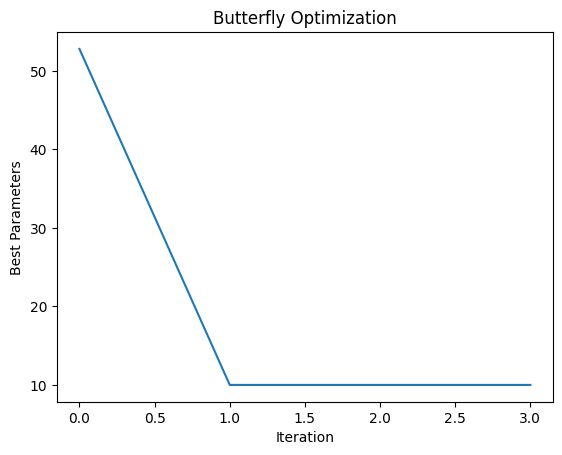

In [22]:
import matplotlib.pyplot as plt

# Plot the best_params over iterations
plt.plot(best_params)
plt.xlabel('Iteration')
plt.ylabel('Best Parameters')
plt.title('Butterfly Optimization')
plt.show()
